In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# initializes the box with r rows and c columns and the partition wall
def initialize(wall, r=10, c=11):
  box = []
  for i in range(r):
    temp = []
    for j in range(c):
      # 1 represents void space within the box walls
      temp.append((1))
    box.append(temp)
  box = np.array(box)
  # a column of 9s represents the wall
  box[:,wall] = 9
  return box

# generates a random position of the particle 
def particleGenerator(wall, r=10, c=11, case="right"):
  try:
    column1 = np.random.randint(wall+1, c)
  except:
    column1 = np.random.randint(0, wall)
  try:
    column2 = np.random.randint(0, wall)
  except:
    column2 = np.random.randint(wall+1, c)
  if case == "right":
    column = column1
  elif case == "left":
    column = column2
  elif case == "any":
    temp = np.random.randint(0,2)
    if temp == 0:
      column = column1
    else:
      column = column2
  row = np.random.randint(0, r)
  return (row, column)

# displaying the box by simply printing it, when called
def display(box):
  print(box, "\n")

# changes the position of the particle by unit distance
def moveParticle(wall, box, particle_position_r, particle_position_c, r, c):
  if particle_position_c > wall:
    while(particle_position_c > wall+1):
      box[particle_position_r][particle_position_c] = 1
      box[particle_position_r][particle_position_c-1] = 0
      particle_position_c -= 1
      # display(box) ### uncomment this block of code to visualize the box during each run
  else:
    while(particle_position_c < wall-1):
      box[particle_position_r][particle_position_c] = 1
      box[particle_position_r][particle_position_c+1] = 0
      particle_position_c += 1
      # display(box)  ### uncomment this block of code to visualize the box during each run

# displays the motion of the particle
def displayParticle(wall, r, c, case="right"):
  box = initialize(wall, r, c)
  particle_position_r = particleGenerator(wall, r, c, case)[0]
  particle_position_c = particleGenerator(wall, r, c, case)[1]
  box[particle_position_r][particle_position_c] = 0
  # display(box) ### uncomment this block of code to visualize the box during each run
  return (box, particle_position_r, particle_position_c)

# when user specifies case = "any", this function generates a random position of the particle within the box
def caseGenerator():
  temp = np.random.randint(0, 2)
  if (temp == 0):
    case = "right"
  else:
    case = "left"
  return case

# main function - outputs the workdone involved in the process for respective cases
def func(r=10, c=11, case="right"):
  count = 0
  total = 0
  boltzmannConst = 1 # in my units, k_B is taken to be equal to 1
  bathTemp = 1 # in my units, T (heat bath temperature) is taken to be equal to 1
  
  if case == "any":
    case = caseGenerator()

  wall = c//2
  box, particle_position_r, particle_position_c = displayParticle(wall, r, c, case)

  while(box[0][0] != 9 and box[r-1][c-1] != 9):
    if case == "right":
      currentVolume = ((c-wall-1)*r) - 1
      pressure = 1/currentVolume
      total -= pressure
      # this is where I have implemented the quadrature rule for numerical integration of the inverse volume (pressure)  
      # the volume changes in each instance when the particle collides with the wall  
      moveParticle(wall, box, particle_position_r, particle_position_c, r, c) 
      wall -= 1
      count -= 1
      box, particle_position_r, particle_position_c = displayParticle(wall, r, c)
    elif case == "left":
      currentVolume = (wall*r)-1
      pressure = 1/currentVolume
      total += pressure
      moveParticle(wall, box, particle_position_r, particle_position_c, r, c)
      wall += 1
      count += 1
      box, particle_position_r, particle_position_c = displayParticle(wall, r, c, case)
  return (count, r*total)

# looping over the main function (func()) to get the statistical average of the corresponding output
def runner(times=100, function="func", case="any"):
  totalCounts = 0
  totalWork = 0
  # Dimensions of the box (user may define them here to increase the precision of the extracted work)
  r = 300 
  c = 301
  for i in range(times):
    ans = function(r=r,c=c,case=case)
    totalCounts += ans[0] 
    totalWork += ans[1] 
  # print("Counts are:",abs(totalCounts/(r/2)),"and Work done is =",(totalWork/times),"\n") 

  # Returns the total work extracted from the Environment
  return (totalWork/times) 

extracted_Work = runner(times=1, function=func, case="left")

print('The total work is equal to:',extracted_Work) 


The total work is equal to: 0.6948277919862903


In [2]:
# looping over the main function (func()) to obtain ln(2) asymptotically
def precision(times=100, function="func", case="any"):
  x_values = np.zeros(times)
  y_values = np.zeros(times)
  totalCounts = 0
  totalWork = 0
  r = 6
  c = 7
  for i in range(times):
    ans = function(r=r,c=c,case=case)
    totalCounts += ans[0]
    totalWork += ans[1]
    r += 4
    c += 4
    x_values[i] = r
    y_values[i] = ans[1]
    print(r, ans[1])
  # print("Counts are:",abs(totalCounts/(r/2)),"and Work done is =",(totalWork/times),"\n")
  # return totalWork/times

  return (x_values,y_values) 

X,Y = precision(times=75, function=func, case="left") 


10 0.8207072934121175
14 0.7574425233514845
18 0.7358591170953143
22 0.7250664179753034
26 0.7186095484892747
30 0.714318280517081
34 0.7112615811945107
38 0.708974524425465
42 0.7071993275586794
46 0.7057816500291216
50 0.704623478783287
54 0.7036595987756964
58 0.7028449419704281
62 0.7021473696314049
66 0.7015433485632493
70 0.7010152529241855
74 0.7005496209085762
78 0.7001359941527576
82 0.6997661246843497
86 0.6994334204691162
90 0.6991325498292618
94 0.6988591540581974
98 0.6986096352202718
102 0.698380997151586
106 0.698170724728265
110 0.6979766910736548
114 0.6977970854430036
118 0.6976303566034902
122 0.6974751679601772
126 0.6973303616805226
130 0.69719492978064
134 0.697067990646801
138 0.6969487698365557
142 0.6968365842763184
146 0.6967308291745826
150 0.6966309671215196
154 0.6965365189604152
158 0.6964470561038195
162 0.6963621940345527
166 0.6962815867837601
170 0.6962049222188647
174 0.6961319180061447
178 0.6960623181378868
182 0.6959958899341235
186 0.6959324214449

In [3]:
# print("X_values are:\n",list(X))
# print("\nY values are:\n",list(Y))

X_new = np.reshape(X,(75,1))
Y_new = np.reshape(Y,(75,1))

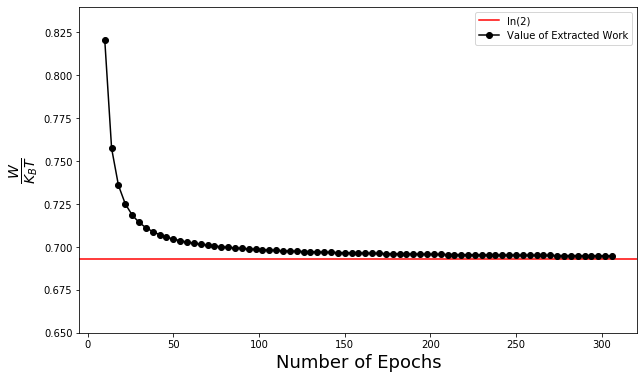

In [4]:
fig = plt.figure(figsize=(10,6))

plt.axhline(y=np.log(2), color='r', linestyle='-',label="ln(2)")
plt.plot(X_new,Y_new,"-ok",label="Value of Extracted Work")
plt.xlabel("Number of Epochs",fontsize=18)
plt.ylabel(r'$\frac{W}{K_B T}$',fontsize=20)
plt.ylim(0.65,0.84)
plt.legend()

plt.savefig("ln(2)_data_2.png",dpi=800,bbox_inches='tight')
plt.show() 

In [6]:
stackedData = np.hstack((X_new,Y_new))

data = []
for i in range(np.size(X_new)):
  data.append(list(list(stackedData)[i]))

In [8]:
import csv

np.savetxt("ln(2)_data.csv", 
           data,
           delimiter =", ", 
           fmt ='% s') 


In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

# initializes the box with r rows and c columns and the partition wall
def initialize(wall, r=10, c=11):
  box = []
  for i in range(r):
    temp = []
    for j in range(c):
      # 1 represents void space within the box walls
      temp.append((1))
    box.append(temp)
  box = np.array(box)
  # a column of 9s represents the wall
  box[:,wall] = 9
  return box

# generates a random position of the particle 
def particleGenerator(wall, r=10, c=11, case="right"):
  try:
    column1 = np.random.randint(wall+1, c)
  except:
    column1 = np.random.randint(0, wall)
  try:
    column2 = np.random.randint(0, wall)
  except:
    column2 = np.random.randint(wall+1, c)
  if case == "right":
    column = column1
  elif case == "left":
    column = column2
  elif case == "any":
    temp = np.random.randint(0,2)
    if temp == 0:
      column = column1
    else:
      column = column2
  row = np.random.randint(0, r)
  return (row, column)

# displaying the box
def display(box):
  print(box, "\n")

# changes the position of the particle by unit distance
def moveParticle(wall, box, particle_position_r, particle_position_c, r, c):
  if particle_position_c > wall:
    while(particle_position_c > wall+1):
      box[particle_position_r][particle_position_c] = 1
      box[particle_position_r][particle_position_c-1] = 0
      particle_position_c -= 1
      # display(box)
  else:
    while(particle_position_c < wall-1):
      box[particle_position_r][particle_position_c] = 1
      box[particle_position_r][particle_position_c+1] = 0
      particle_position_c += 1
      # display(box)

# displays the motion of the particle
def displayParticle(wall, r, c, case="right"):
  box = initialize(wall, r, c)
  particle_position_r = particleGenerator(wall, r, c, case)[0]
  particle_position_c = particleGenerator(wall, r, c, case)[1]
  box[particle_position_r][particle_position_c] = 0
  # display(box)
  return (box, particle_position_r, particle_position_c)

# when user specifies case = "any", this function generates a random position of the particle within the box
def caseGenerator():
  temp = np.random.randint(0, 2)
  if (temp == 0):
    case = "right"
  else:
    case = "left"
  return case

# main function - outputs the workdone involved in the process for respective cases
def func(r=10, c=11, case="right"):
  work = 0
  total = 0
  boltzmannConst = 1 # in my units, k_B is taken to be equal to 1
  bathTemp = 1 # in my units, T (heat bath temperature) is taken to be equal to 1
  
  if case == "any":
    case = caseGenerator()

  wall = c//2
  box, particle_position_r, particle_position_c = displayParticle(wall, r, c, case)

  # display(box) 

  while(box[0][0] != 9 and box[r-1][c-1] != 9):
    if case == "right":
      currentVolume = ((c-wall-1)*r) - 1
      pressure = 1/currentVolume
      total -= pressure
      moveParticle(wall, box, particle_position_r, particle_position_c, r, c)
      wall -= 1
      work += 1
      box, particle_position_r, particle_position_c = displayParticle(wall, r, c)
    elif case == "left":
      currentVolume = (wall*r)-1
      pressure = 1/currentVolume
      total += pressure
      moveParticle(wall, box, particle_position_r, particle_position_c, r, c)
      wall += 1
      work += 1
      box, particle_position_r, particle_position_c = displayParticle(wall, r, c, case)
  return (work, r*total)

# looping over the main function (func()) to get the corresponding output
def runner(times=100, function="func", case="any"):
  y_values = np.zeros(times)
  totalCounts = 0
  totalWork = 0
  # Dimensions of the box 
  r = 20 
  c = 21
  for i in range(times):
    ans = function(r=r,c=c,case=case)
    totalCounts += ans[0] 
    totalWork += ans[1] 
    y_values[i] = ans[1] 
  # print("Counts are:",abs(totalCounts/(r/2)),"and Work done is =",(totalWork/times),"\n") 
  
  # Returns the total work extracted from the Environment
  return (totalWork/times) 

anyCase = np.zeros(60)
leftCase = np.zeros(60)

for i in range(60):  
  anyCase[i] = runner(times=1000, function=func, case="any")
  leftCase[i] = runner(times=1000, function=func, case="left")

anyCase

array([-0.03895974, -0.03607384, -0.00721477, -0.0187584 ,  0.03895974,
       -0.00288591,  0.00577181, -0.01010067,  0.00432886, -0.02453021,
        0.03607384, -0.0216443 , -0.00721477,  0.03174498, -0.03463088,
        0.02597316,  0.01587249, -0.02308726,  0.01298658, -0.03030202,
       -0.00865772, -0.02308726,  0.01298658,  0.01154363, -0.04906042,
       -0.03030202, -0.02308726, -0.03030202,  0.00865772, -0.00865772,
        0.02741612,  0.03030202, -0.01010067, -0.01010067, -0.02597316,
       -0.02308726, -0.02020135, -0.03463088,  0.01010067, -0.00288591,
       -0.04617451,  0.0187584 ,  0.01298658, -0.02308726, -0.00721477,
        0.03174498, -0.02020135,  0.05194633,  0.03318793,  0.02020135,
       -0.01154363,  0.00577181, -0.00432886,  0.01298658, -0.00577181,
        0.01442953, -0.00577181,  0.02453021, -0.01442953, -0.02308726])

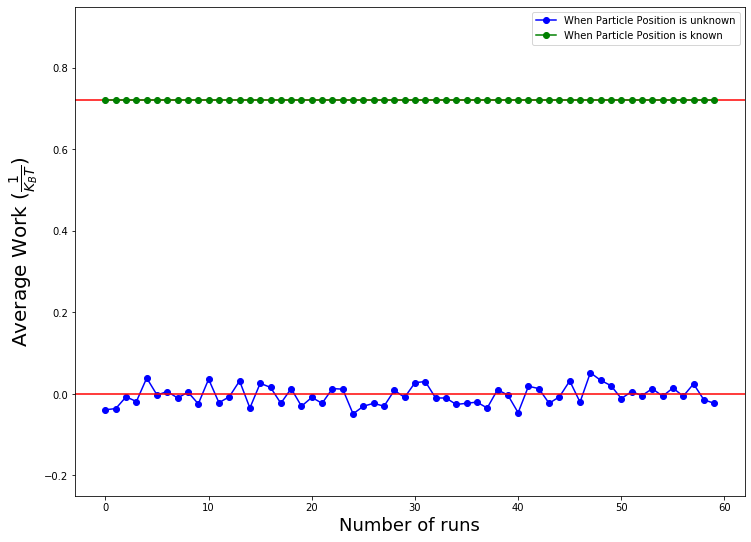

In [12]:
fig = plt.figure(figsize=(12,9)) 

plt.plot(anyCase,"-ob",label="When Particle Position is unknown")
plt.axhline(y=leftCase[-1], color='r', linestyle='-')
plt.plot(leftCase,"-og",label="When Particle Position is known")
plt.axhline(y=0, color='r', linestyle='-') 
plt.ylim(-0.25,0.95)
plt.xlabel("Number of runs",fontsize=18)
plt.ylabel(r'Average Work ($\frac{1}{K_B T}$)',fontsize=20) 
plt.legend()
plt.savefig("avg_work_data_2.png",dpi=800,bbox_inches='tight')
plt.show() 

In [13]:
np.savetxt("anyCase_data.csv", 
           anyCase,
           delimiter =", ", 
           fmt ='% s')

np.savetxt("knownPos_data.csv", 
           leftCase,
           delimiter =", ", 
           fmt ='% s')